# CPSC320: Program 1 - MLP Model for Flower Classification
In this assignment, you need to build a MultiLayer Perceptron (MLP) model using **tensorflow Keras** (not Torch) to classify images of flowers. You will utilize data augmentation and ImageDataGenerator to preprocess the images, followed by training a MLP model.

In [ ]:
# training data needs to be uploaded to colab as a zip file.
# !unzip flowers_train_validation.zip

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Utility functions provided in utility.py
def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()


def pred_act_visualization(num, x_test, preds, actuals):

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num):
        img = x_test[i]
        ax = fig.add_subplot(1, num, i + 1)
        ax.axis("off")
        ax.text(
            0.5,
            -0.35,
            "pred = " + str(preds[i]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.text(
            0.5,
            -0.7,
            "act = " + str(actuals[i]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.imshow(img)

## 1: Data Preparation and Augmentation
We'll use the ImageDataGenerator class to augment our training data and rescale the images. Data augmentation helps in increasing the diversity of the training data, which helps in reducing overfitting.

### 1.1 Train Data Generator

In [ ]:
# Create ImageDataGenerators for training data
# Step 1: Create ImageDataGenerators for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    './flowers_train_validation/train',  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=128,
    class_mode='categorical'
)

Found 3456 images belonging to 5 classes.


In [ ]:
# Step 2:  display the basic information of train generator
print(f"Number of samples: {train_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Image shape: {train_generator.image_shape}")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Target size: {train_generator.target_size}")
print(f"Filenames: {train_generator.filenames[:5]}")

Number of samples: 3456
Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Batch size: 128
Image shape: (150, 150, 3)
Number of classes: 5
Target size: (150, 150)
Filenames: ['daisy/daisy_000002.png', 'daisy/daisy_000004.png', 'daisy/daisy_000007.png', 'daisy/daisy_000008.png', 'daisy/daisy_000009.png']


### 1.2 Validation Data Generator

The validation_datagen is only rescaled, as no augmentation is needed. Why? Think about the purpose of doing augmentation.

#### Task 1: Validation data generator

You need to do the followings:
- Create validation datagenerator. Note: The validation datagenerator is only rescaled, as no augmentation is needed. Why? Think about the purpose of doing augmentation.
- Display the basic informtion for the validation generator.

In [ ]:
# create validation generator with rescale, no augmentation
# your code below

In [ ]:
validation_gen = ImageDataGenerator(rescale=1./255)

validation_dat = validation_gen.flow_from_directory(
    './flowers_train_validation/validation',  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical'
)

Found 865 images belonging to 5 classes.


In [ ]:
# Step 2:  display the basic information of validation generator
# your code below
print(f"Number of samples: {validation_dat.samples}")
print(f"Class indices: {validation_dat.class_indices}")
print(f"Batch size: {validation_dat.batch_size}")
print(f"Image shape: {validation_dat.image_shape}")
print(f"Number of classes: {validation_dat.num_classes}")
print(f"Target size: {validation_dat.target_size}")
print(f"Filenames: {validation_dat.filenames[:5]}")

Number of samples: 865
Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Batch size: 32
Image shape: (150, 150, 3)
Number of classes: 5
Target size: (150, 150)
Filenames: ['daisy/daisy_000001.png', 'daisy/daisy_000003.png', 'daisy/daisy_000005.png', 'daisy/daisy_000006.png', 'daisy/daisy_000012.png']


### 2: Display flower dataset from train/validation generator

In [ ]:
print(type(train_generator))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
# Get a batch of images and labels
batch = next(train_generator)

batch_images, batch_labels = batch[0], batch[1]
print(batch_images.shape, batch_labels.shape)

# Get the first image and label from the batch
first_image = batch_images[0]  # First image
first_label = batch_labels[0]  # First label

# Print shape and label to verify
print(f"First image shape: {first_image.shape}")
print(f"First label: {first_label}")

(128, 150, 150, 3) (128, 5)
First image shape: (150, 150, 3)
First label: [0. 0. 1. 0. 0.]


#### Task 2: Display the flowers

You need to do the followings:
- Display the first 10 images from the batch of train generator
- Print out the first 10 labels from the batch of the train generator

Hint:
- You may find display function useful from utility.py
- You may look at the example the from the textbook https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/02_deeplearning/01_mlp/mlp.ipynb

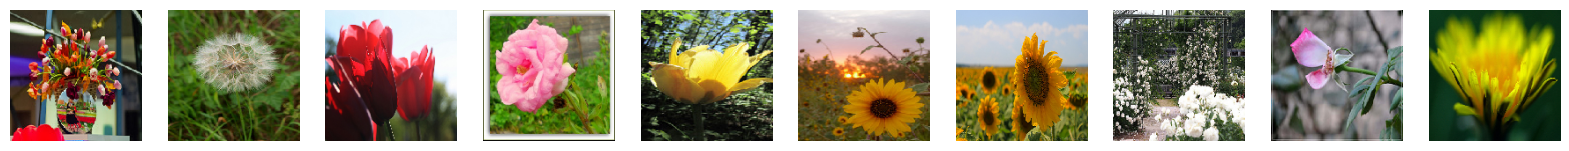

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
# Display the first 10 images and print out the corresponging labels
# your code below
images, labels = next(validation_dat)

display(images[:10])
print(labels[:10])



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3: Building the MLP Model
Now you will build the MLP model using Keras' Sequential API.

#### Task 3: Build the MLP model

You need to do the followings:
- Build the MLP model. You may choose any number hiddend layers and activation functions if you want, but should pay attention to the followings
  - Create an input layer that accepts the shape that is as same as the shape from the datagenerator (150,150,3)
  - You final output layer should match the number of classes (5 in our dataset)
- Display model summary

In [ ]:
# Step 3: Build your model
# import necessary libaries if needed
from tensorflow.keras import models, layers

# you model below
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(5, activation='softmax')) # output layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               13500200  
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 5)                 755       
                                                                 
Total params: 13531105 (51.62 MB)
Trainable params: 13531105 (51.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4: Compiling the Model

#### Task 4: Compile the MLP model

You need to do the followings:
-  Set 'Adam' as the optimizer
-  Set 'categorical_crossentropy' as the loss
-  Set 'accuracy' as the metrics

In [ ]:
# Step 4: Compile the model
# your code below

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### 5: Training the MLP Model

#### Task 5: Train the MLP model

You need to do the followings:
-  Specify the train generator and validaion generator.
-  Speficy the epoch to be 30
-  You should save the model train by doing something like *history = model.fit()*, so that history carries the information for further plotting

In [ ]:
# Do not delete the following line, otherwise you will get the problem when fitting.
train_generator.reset()  # This resets the generator to start from the beginning

In [ ]:
# Step 5: Train the model
# your code below

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_dat
)



Epoch 1/30
27/27 [==============================] - 25s 885ms/step - loss: 11.5884 - accuracy: 0.2312 - val_loss: 3.2272 - val_accuracy: 0.2659
Epoch 2/30
27/27 [==============================] - 23s 857ms/step - loss: 1.9629 - accuracy: 0.3348 - val_loss: 1.6121 - val_accuracy: 0.3491
Epoch 3/30
27/27 [==============================] - 24s 875ms/step - loss: 1.5733 - accuracy: 0.3594 - val_loss: 1.5548 - val_accuracy: 0.3387
Epoch 4/30
27/27 [==============================] - 23s 865ms/step - loss: 1.4689 - accuracy: 0.3718 - val_loss: 1.3032 - val_accuracy: 0.4393
Epoch 5/30
27/27 [==============================] - 23s 851ms/step - loss: 1.3761 - accuracy: 0.3944 - val_loss: 1.3056 - val_accuracy: 0.4139
Epoch 6/30
27/27 [==============================] - 24s 872ms/step - loss: 1.3897 - accuracy: 0.4002 - val_loss: 1.2952 - val_accuracy: 0.4358
Epoch 7/30
27/27 [==============================] - 23s 852ms/step - loss: 1.4710 - accuracy: 0.3819 - val_loss: 1.4369 - val_accuracy: 0.410

In [ ]:
# extract information
print(history.history['accuracy'][:2]) # train accuracy on the first two epochs
print(history.history['val_accuracy'][:2]) # validation accuracy on the first two epochs
print(history.history['loss'][:2]) # train loss on the first two epochs
print(history.history['val_loss'][:2]) # validation loss on the first two epochs

[0.23119212687015533, 0.33478009700775146]
[0.2658959627151489, 0.3491329550743103]
[11.588358879089355, 1.9629111289978027]
[3.2272279262542725, 1.6120507717132568]


#### Task 6: Plot train/valiation loss and accuracy
You need to do the followings:
-  do one plot on train/valiation loss
-  do another and accuracy

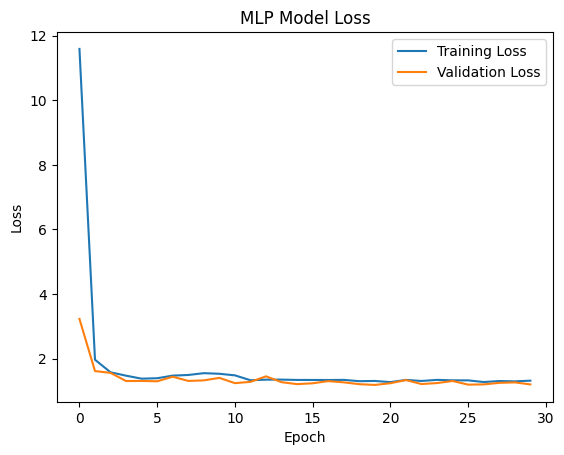

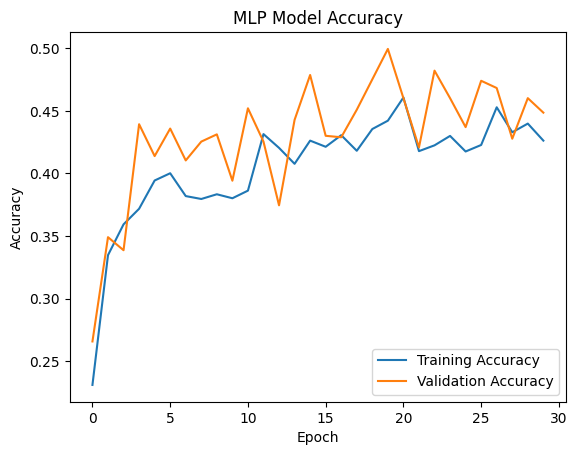

In [ ]:
import matplotlib.pyplot as plt

# your code below

# Plot the training and validation loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("MLP Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()